In [2]:
import numpy as np
from astropy.io import fits
from loguru import logger
from pathlib import Path

from surfh.Models import instru

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy import ndimage

from sklearn.decomposition import NMF
from einops import rearrange


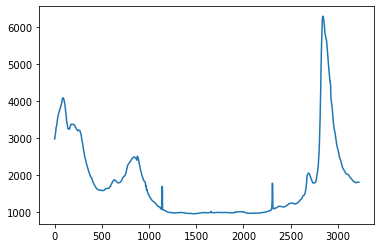

In [13]:
hdul = fits.open('/home/nmonnier/Data/JWST/Orion_bar/Scan/overwritten_ChannelCube_ch2-shortmediumlong_s3d.fits')
data_cube = hdul[1].data

# replace Nan with 0
data_cube[np.isnan(data_cube)] = 0

data = rearrange(data_cube, 'L I J -> (I J) L') # from spectro data

# Range of components to test
component_range = range(1, 12)  # Adjust based on how many tests you want to run

plt.plot(np.mean(data_cube, axis=(1,2)))

/home/nmonnier/anaconda3/envs/mrs/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/home/nmonnier/anaconda3/envs/mrs/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/home/nmonnier/anaconda3/envs/mrs/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/home/nmonnier/anaconda3/envs/mrs/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/home/nmonnier/anaconda3/envs/mrs/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterati

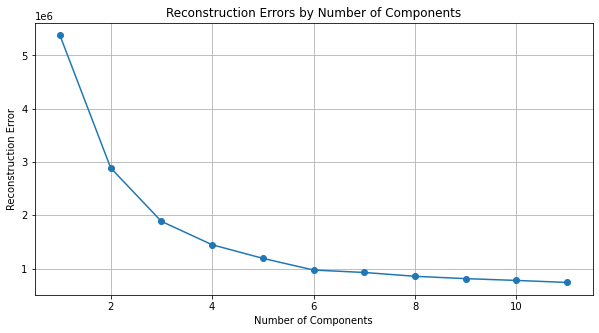

In [8]:
# List to store the reconstruction errors
reconstruction_errors = []

# Compute NMF for different numbers of components and calculate the reconstruction errors
for n_components in component_range:
    nmf = NMF(n_components=n_components, init='random', random_state=42)
    W = nmf.fit_transform(data)  # W is the weight matrix
    H = nmf.components_          # H is the feature matrix (components)
    reconstructed = W @ H        # Reconstruct the original matrix
    error = np.linalg.norm(data - reconstructed)  # Frobenius norm
    reconstruction_errors.append(error)

# Plotting the reconstruction errors
plt.figure(figsize=(10, 5))
plt.plot(component_range, reconstruction_errors, marker='o')
plt.title('Reconstruction Errors by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error')
plt.grid(True)


In [15]:
from sklearn.decomposition import NMF

# Initialize NMF with the desired number of components
nmf = NMF(n_components=10, init='random', random_state=31, max_iter=1000)

# Fit NMF model to your data
nmf.fit(data)

# Extract the components (eigenvectors)
components = nmf.components_

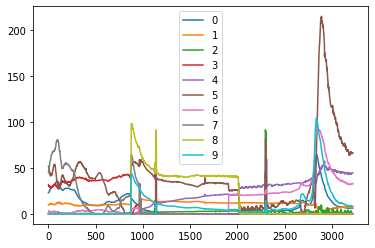

In [16]:
plt.figure()
for i in range(components.shape[0]):
    plt.plot(components[i], label=i)
plt.legend()